In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
import string
from collections import Counter

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('/kaggle/input/memotion-with-captions/memotion_dataset_with_captions_BLIP.csv')
df.loc[df['text_corrected'].isna()] = 'nan'

/tmp/ipykernel_18/4125826724.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['text_corrected'].isna()] = 'nan'


In [3]:
captions = df[['image_name','caption']]
captions.to_csv('caption_BLIP.csv', index=False)

In [4]:
df.head()

Unnamed: 0    image_name                                           text_ocr  \
0          0   image_1.jpg  LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...   
1          1  image_2.jpeg  The best of #10 YearChallenge! Completed in le...   
2          2   image_3.JPG  Sam Thorne @Strippin ( Follow Follow Saw every...   
3          3   image_4.png              10 Year Challenge - Sweet Dee Edition   
4          4   image_5.png  10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...   

                                      text_corrected      humour  \
0  LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...   hilarious   
1  The best of #10 YearChallenge! Completed in le...   not_funny   
2  Sam Thorne @Strippin ( Follow Follow Saw every...  very_funny   
3              10 Year Challenge - Sweet Dee Edition  very_funny   
4  10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...   hilarious   

           sarcasm       offensive      motivational overall_sentiment  \
0          general   not_offensive  not_motivational     very_positive   
1          general   not_offensive      motivational     very_positive   
2    not_sarcastic   not_offensive  not_motivational          positive   
3  twisted_meaning  very_offensive      motivational          positive   
4     very_twisted  very_offensive  not_motivational           neutral   

                                          image_path  \
0  /kaggle/input/memotion-dataset-7k/memotion_dat...   
1  /kaggle/input/memotion-dataset-7k/memotion_dat...   
2  /kaggle/input/memotion-dataset-7k/memotion_dat...   
3  /kaggle/input/memotion-dataset-7k/memotion_dat...   
4  /kaggle/input/memotion-dataset-7k/memotion_dat...   

                                             caption  
0  a couple of toy story characters standing next...  
1  the best of 10 year challenge completed in les...  
2  there is a green trash can next to a green tra...  
3  there are two pictures of a woman and an ostri...  
4  two pictures of a man and a woman with a micro...

In [5]:
def visualize_image_1(index):

    row = df.iloc[index]
    
    # Load the image
    img_path = row['image_path']
    img_name = row['image_name']
    img = mpimg.imread(img_path)
    
    # Extract the OCR text and caption
    text_ocr = row['text_ocr']
    caption = row['caption']
    offensive = row['offensive']
    
    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    
    # Display OCR text and caption
    plt.title(f"Text OCR: {text_ocr}\n\nCaption: {caption}\n\nOffensive: {offensive} \n\n name:{img_name}", fontsize=12)
    plt.show()

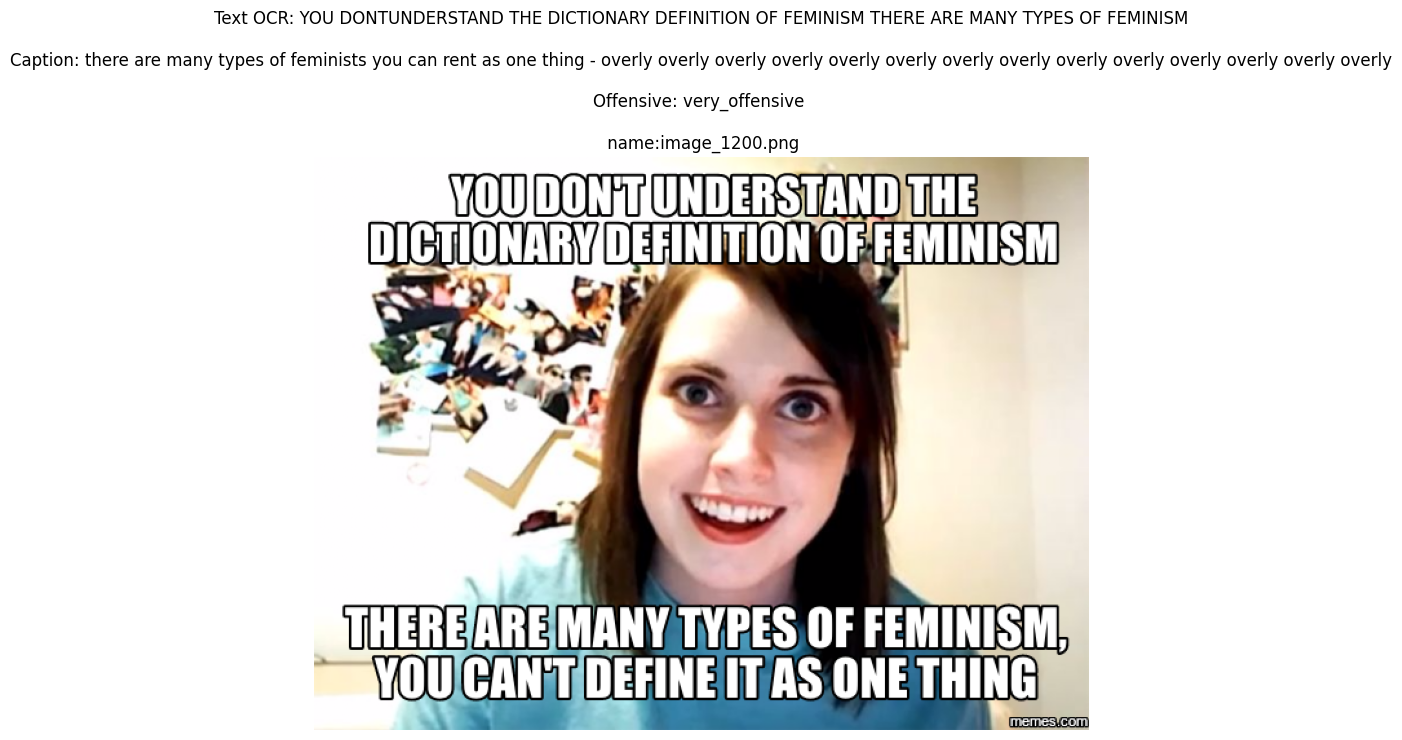

In [6]:
index = rd.randint(0,len(df))
visualize_image_1(index)

In [7]:
def visualize_image(image_name):
    row = df[df['image_name'] == image_name].iloc[0]  
    
    # Load the image
    img_path = row['image_path']
    img_name = row['image_name']
    img = mpimg.imread(img_path)
    
    # Extract the OCR text and caption
    text_ocr = row['text_ocr']
    caption = row['caption']
    offensive = row['offensive']
    
    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    
    # Display OCR text and caption
    plt.title(f"Text OCR: {text_ocr}\n\nCaption: {caption}\n\nOffensive: {offensive}\n\nName: {img_name}", fontsize=12)
    plt.show()

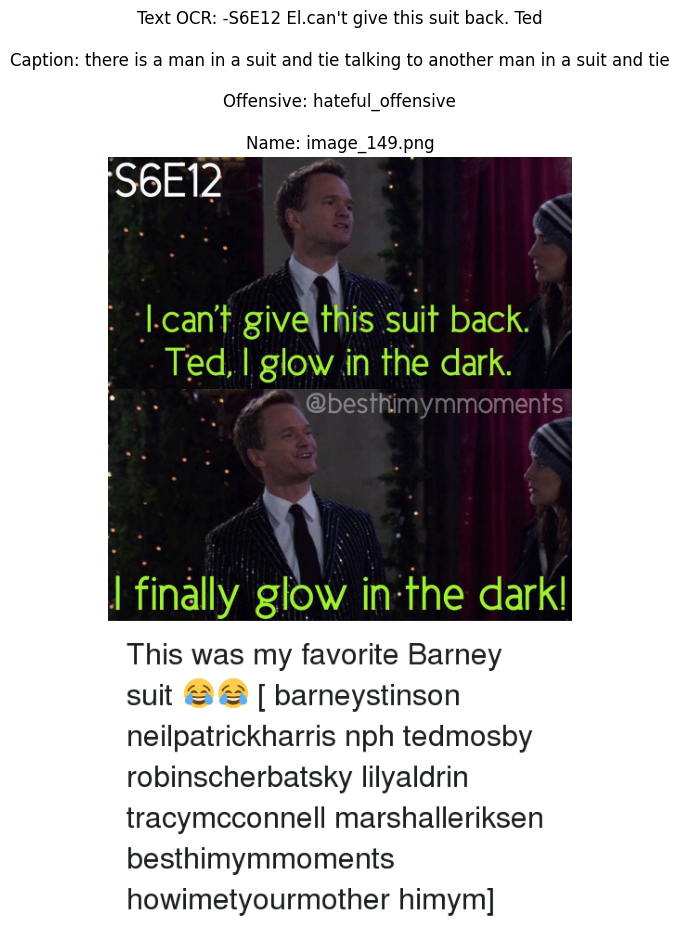

In [8]:
visualize_image('image_149.png')

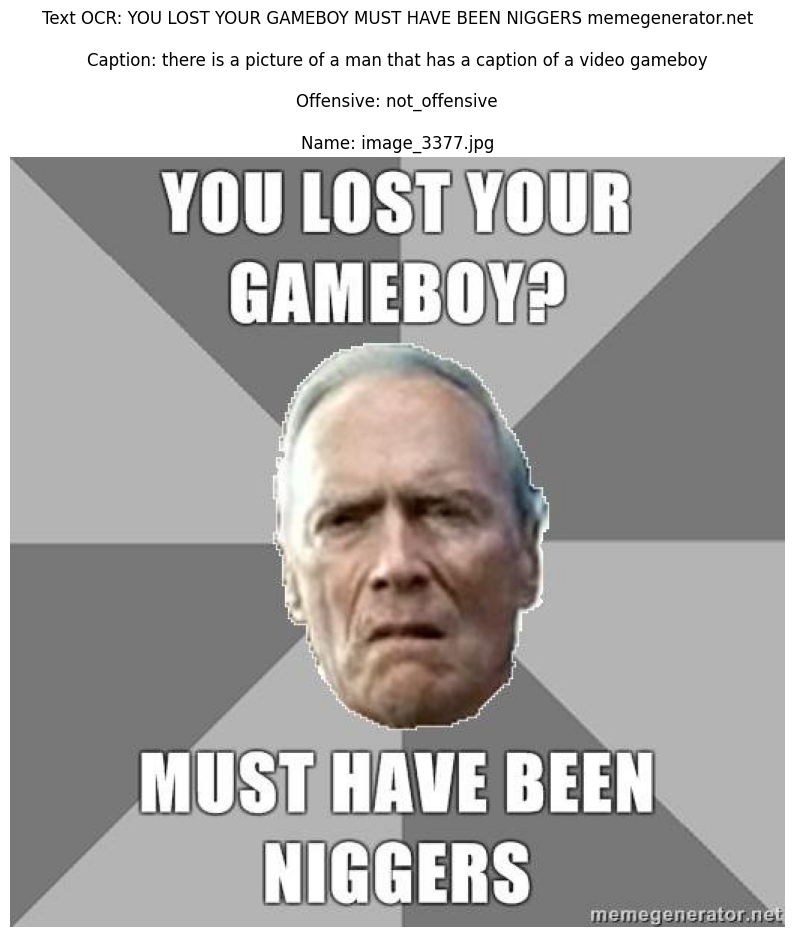

In [9]:
visualize_image('image_3377.jpg')

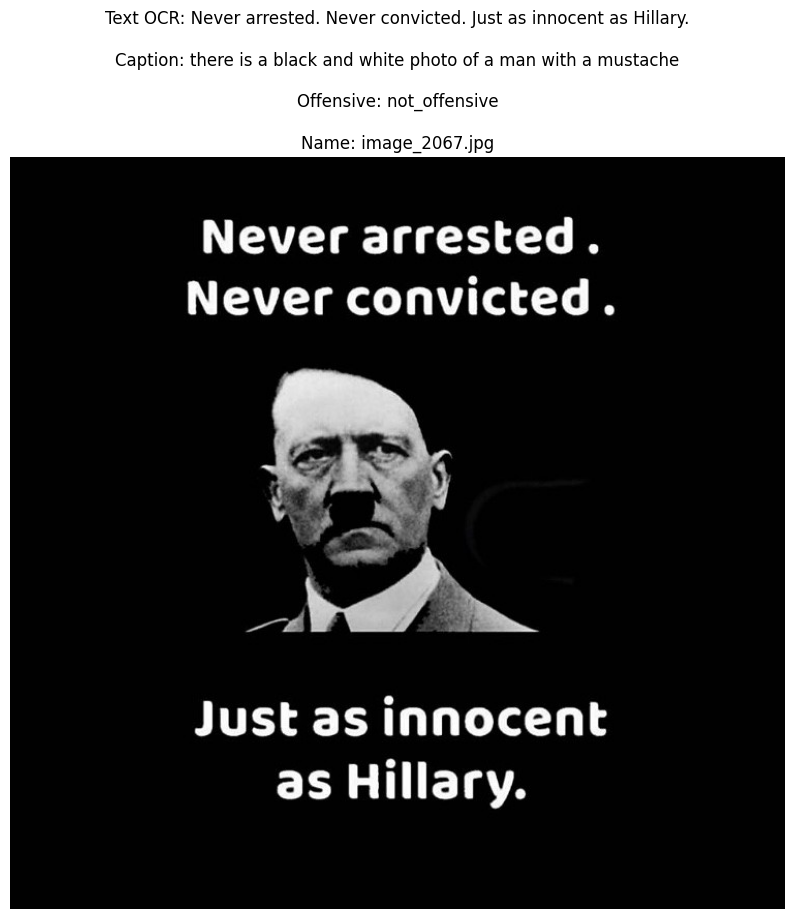

In [10]:
visualize_image('image_2067.jpg')

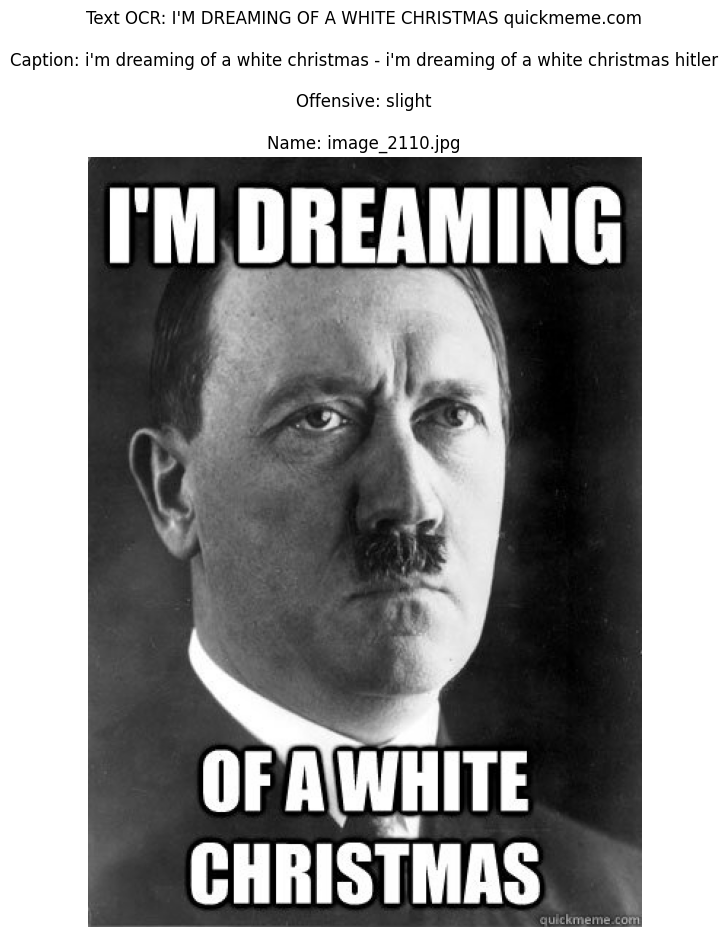

In [11]:
visualize_image('image_2110.jpg')

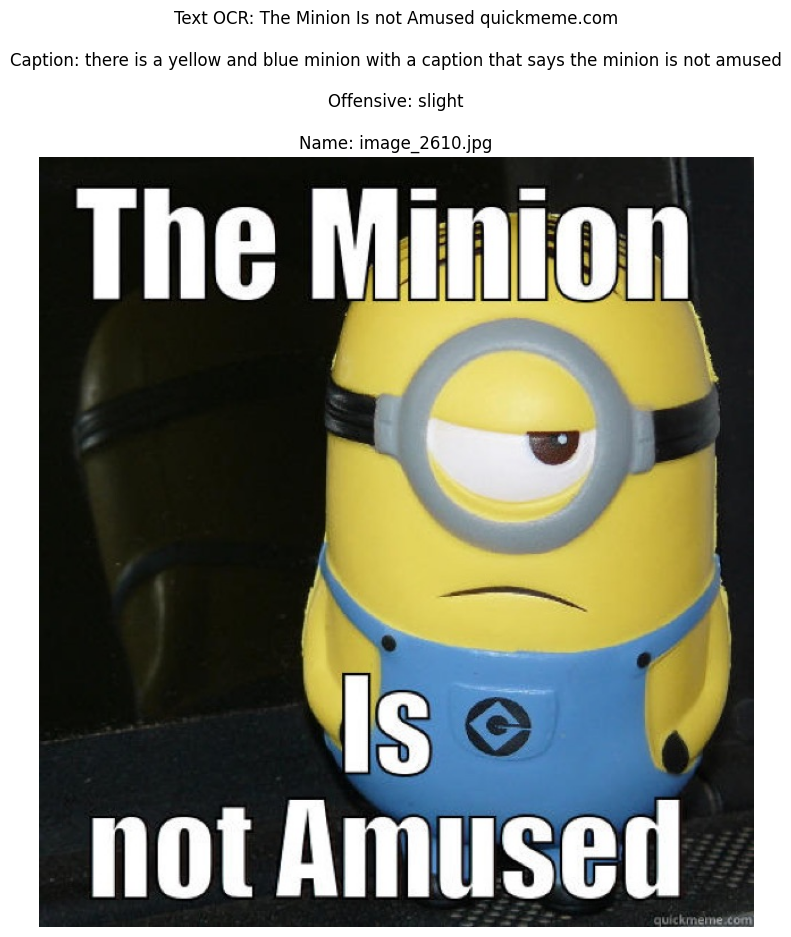

In [12]:
visualize_image('image_2610.jpg')

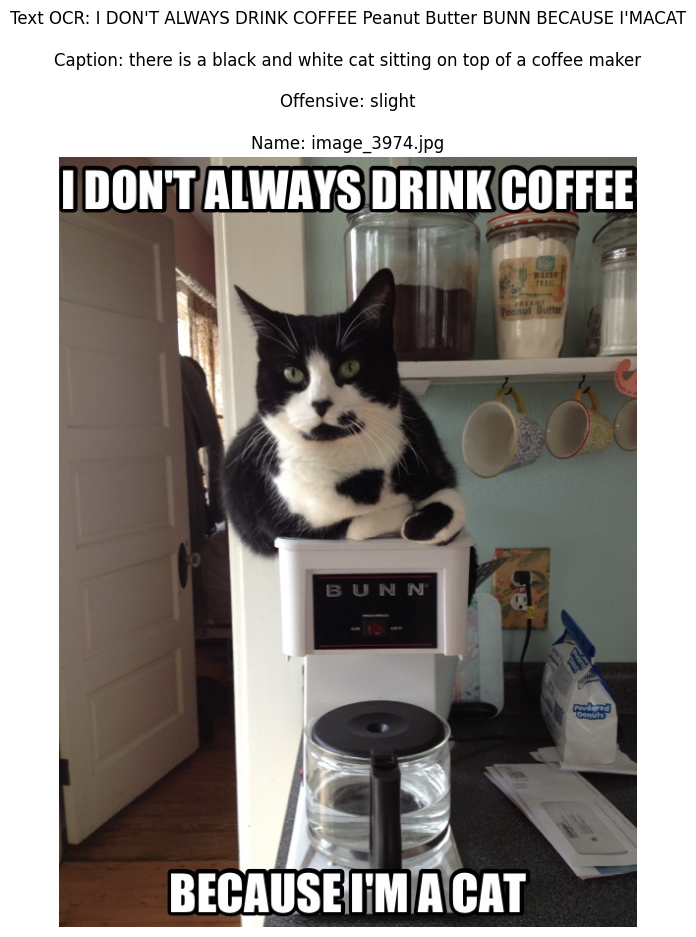

In [13]:
visualize_image('image_3974.jpg')

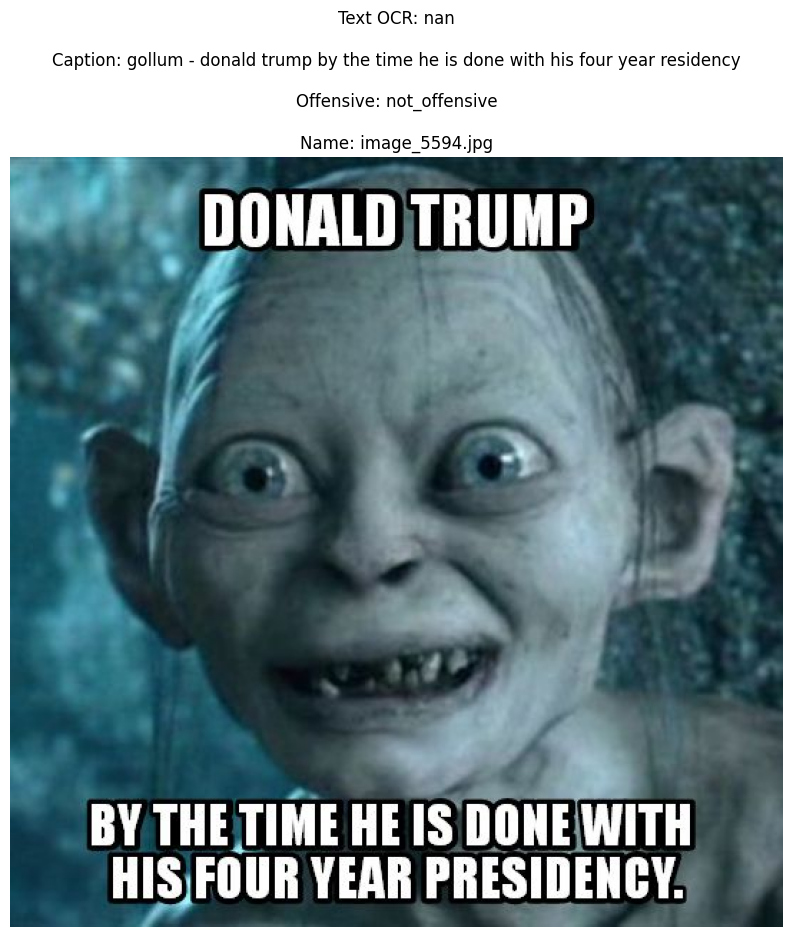

In [14]:
visualize_image('image_5594.jpg')

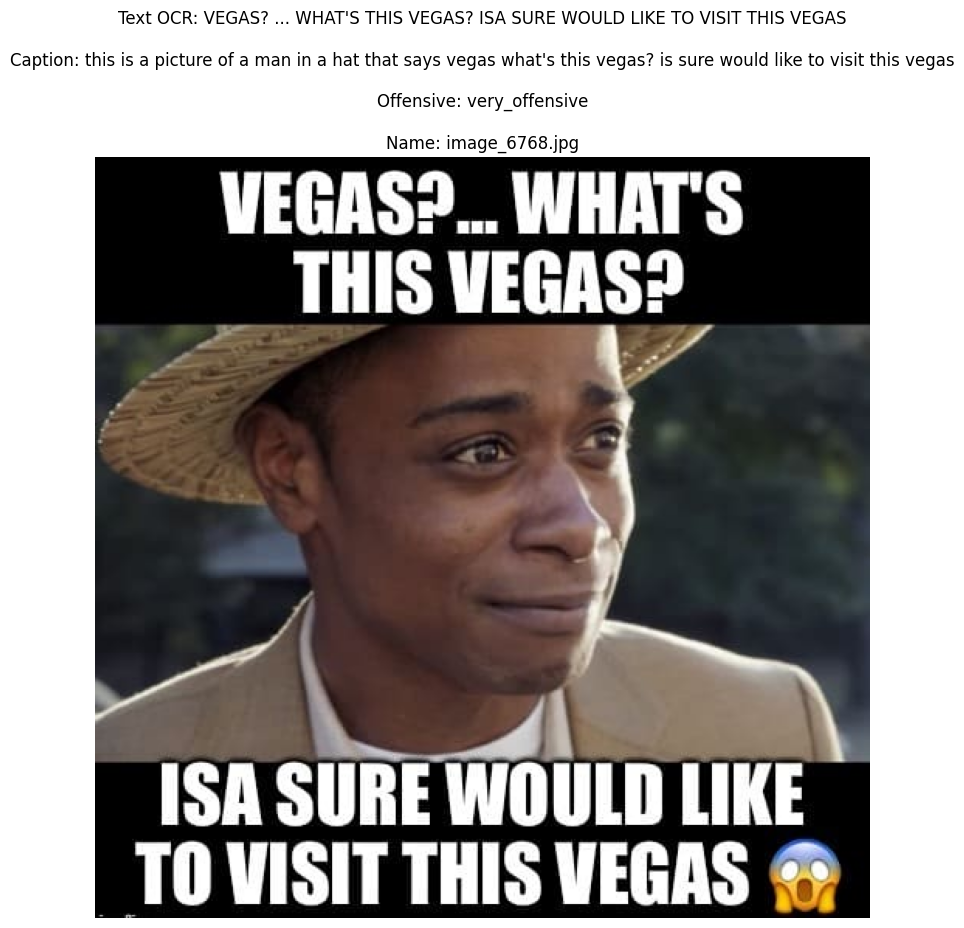

In [15]:
visualize_image('image_6768.jpg')

In [16]:
r = pd.read_csv("/kaggle/input/memotion-rationales/rationales.csv")
r[r['image_name']=='image_6768.jpg']['rationale'].values

array(['The meme combines an image of a man in a hat with the text "VEGAS? ... WHAT\'S THIS VEGAS? ISA SURE WOULD LIKE TO VISIT THIS VEGAS." The use of the word "VEGAS" in the text and the image of a man in a hat with the word "VEGAS" on it creates a humorous and playful tone, but the meme also contains a potentially offensive element.\n\nThe text "ISA SURE WOULD LIKE TO VISIT THIS VEGAS" is written in a way that is reminiscent of a stereotypical "Valley Girl" accent, which could be perceived as mocking or belittling a particular group of people. Additionally, the use of the word "VEGAS" in the text and image could be seen as a reference to the city of Las Vegas, which is often associated with excess, indulgence, and hedonism.\n\nOverall, the meme combines elements of humor, playfulness, and potentially offensive stereotypes, which could be perceived as offensive or inappropriate by some viewers.'],
      dtype=object)

In [17]:
def preprocess(df):
    df = df.drop('Unnamed: 0', axis=1)
    df = df.sample(frac=1).reset_index(drop=True)
    df['offensive'] = np.where(df['offensive'] == 'not_offensive', 'not_offensive', 'offensive')

    df['offensive'] = df['offensive'].map({
        'not_offensive': 0, 
        'offensive': 1
    })
    return df
df = preprocess(df)

In [18]:
df_offensive = df[df['offensive'] == 1]
df_not_offensive = df[df['offensive'] == 0]

In [19]:
def word_count(df):  
    joined_text = df['text_corrected'].str.cat(sep=' ').lower()
    joined_text = joined_text.translate(str.maketrans('', '', string.punctuation))
    words = joined_text.split()
    stop_words = set(stopwords.words('english'))
    custom_stop_words = {'imgflipcom', 'quickmemecom','meme','memes','memecentercom','IM','dont','youre','one','memegeneratornet'}
    stop_words.update(custom_stop_words)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    word_counts = Counter(filtered_words)
    ranked_words = word_counts.most_common()
    # Display the ranked words
    for word, count in ranked_words[:50]:
        print(f"{word}: {count}")

In [20]:
word_count(df)

like: 590
im: 471
bill: 466
know: 265
get: 253
people: 215
make: 213
time: 190
see: 181
never: 175
friends: 173
got: 161
cant: 158
think: 158
love: 157
want: 153
go: 153
look: 153
doesnt: 151
someone: 145
best: 145
say: 145
made: 141
day: 138
would: 137
girlfriend: 134
man: 134
friend: 132
always: 128
trump: 127
said: 126
new: 125
u: 121
girl: 121
country: 120
good: 120
life: 118
need: 113
thats: 113
first: 113
still: 111
says: 111
hillary: 111
back: 110
women: 109
hitler: 106
liam: 104
happy: 104
chuck: 103
could: 102


In [21]:
word_count(df_offensive)

like: 357
im: 288
bill: 254
people: 155
get: 150
know: 147
make: 138
never: 115
see: 105
time: 105
want: 104
friends: 103
go: 97
got: 96
cant: 95
say: 95
think: 92
doesnt: 92
look: 91
love: 90
would: 86
girlfriend: 85
day: 85
best: 85
made: 84
country: 82
someone: 81
said: 78
always: 78
trump: 77
hillary: 75
man: 75
new: 74
girl: 72
hitler: 71
funny: 71
thats: 70
good: 70
still: 69
world: 69
need: 67
says: 67
back: 67
friend: 67
first: 67
women: 66
liam: 65
chuck: 64
could: 63
life: 63


In [22]:
word_count(df_not_offensive)

like: 233
bill: 212
im: 183
know: 118
get: 103
time: 85
see: 76
make: 75
friends: 70
love: 67
think: 66
friend: 65
got: 65
someone: 64
cant: 63
look: 62
never: 60
best: 60
people: 60
u: 59
man: 59
doesnt: 59
made: 57
go: 56
life: 55
day: 53
would: 51
new: 51
trump: 50
always: 50
good: 50
say: 50
happy: 49
girl: 49
girlfriend: 49
want: 49
said: 48
first: 46
need: 46
smart: 45
says: 44
women: 43
thats: 43
movie: 43
back: 43
dicaprio: 43
still: 42
going: 41
leonardo: 41
norris: 40


In [23]:
def count_tokens(sentence):
    return len(word_tokenize(sentence))

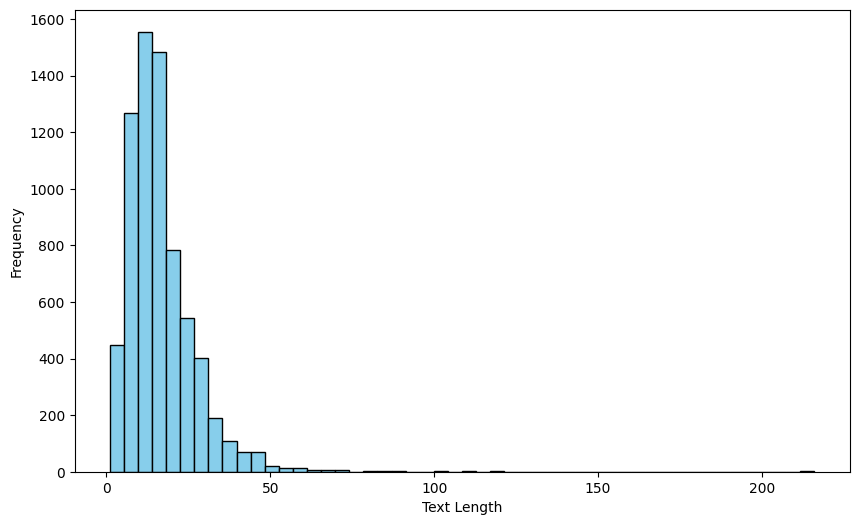

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to create histogram of text lengths in a DataFrame column
def plot_text_length_histogram(df, column_name):
    # Calculate lengths of text in the specified column
    text_lengths = df[[column_name]].map(count_tokens)
    
    # Plotting histogram
    plt.figure(figsize=(10, 6))
    plt.hist(text_lengths, bins=50, color='skyblue', edgecolor='black')
    
    # Adding labels and title
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    #plt.title(f'Distribution of number of token')
    
    # Display the plot
    plt.grid(False)
    plt.savefig('text_length_histogram.png')
    plt.show()

df.loc[df['text_corrected'].isna()] = 'nan'
plot_text_length_histogram(df, 'text_corrected')

In [25]:
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    custom_stop_words = {'imgflipcom', 'quickmemecom','meme','memes','memecentercom','IM','dont','youre','one','memegeneratornet'}
    stop_words.update(custom_stop_words)    
    # Remove punctuation and stopwords
    tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    # Join tokens back into a single string
    return ' '.join(tokens)
# Function to generate word cloud from a DataFrame column

def generate_word_cloud(df, column_name,file_name):

    df['cleaned_text'] = df[column_name].apply(preprocess_text)
    text_combined = ' '.join(df['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', random_state=42).generate(text_combined)
    
    # Plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    #plt.title(f'Word Cloud of Column "{column_name}"')
    plt.savefig(file_name)
    plt.show()

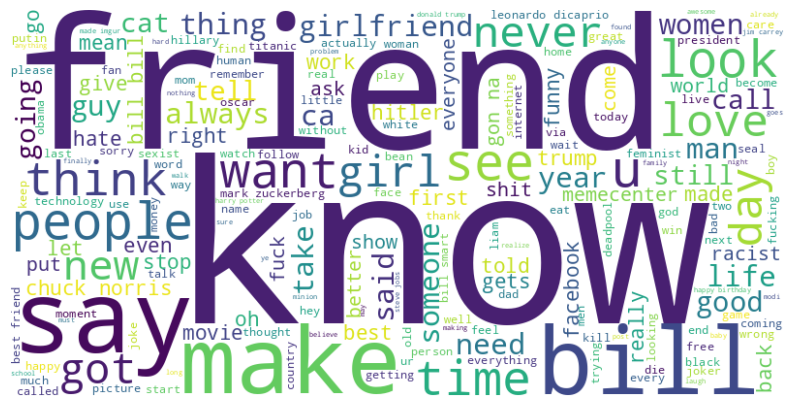

In [26]:
generate_word_cloud(df, 'text_corrected','cloud.png')

/tmp/ipykernel_18/3076980653.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df[column_name].apply(preprocess_text)


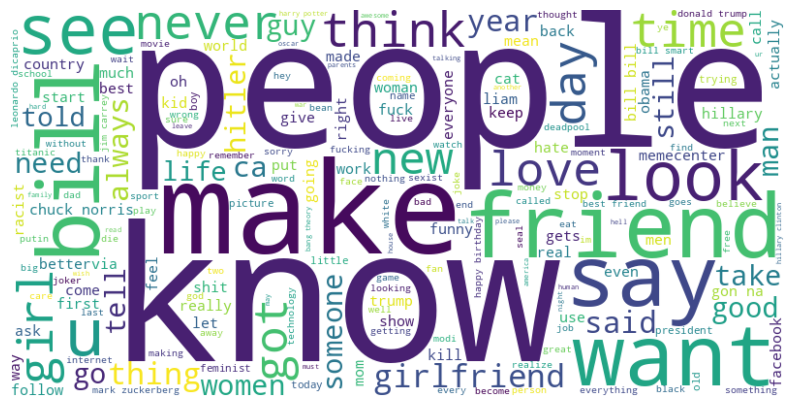

In [27]:
generate_word_cloud(df_offensive,'text_corrected','cloud_offensive.png')

/tmp/ipykernel_18/3076980653.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df[column_name].apply(preprocess_text)


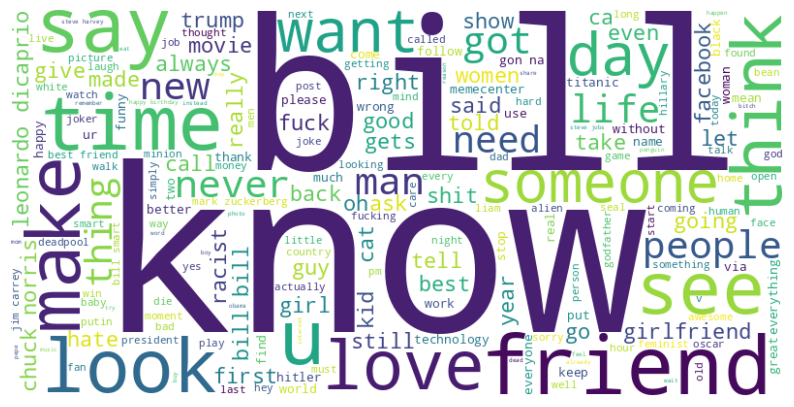

In [28]:
generate_word_cloud(df_not_offensive, 'text_corrected','cloud_not_offensive.png')